In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Data Understanding, Cleaning and Preprocessing
- Data Source
- Data Types and Formats
- Data Quality Assessment 
- Missing Data Handling
- Outlier Detection and Treatment 
- Data Trasformation

In [2]:
#read the dataset and check the first five rows
loan_df = pd.read_csv('/Users/a0j063t/Documents/Lending_Club/loan.csv')
loan_df.head()

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/4152787389.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('/Users/a0j063t/Documents/Lending_Club/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Checking the shape of the dataframe
print(loan_df.shape)
loan_df.info(max_cols=111)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   hom

Removing the column which is null value or can't be useful for our analysis

In [4]:
#Calc missing value % for all columns
loan_df_null_precentage = loan_df.isnull().sum()/len(loan_df)*100
#Sorting the values in the descending order 
loan_df_null_precentage.sort_values(ascending = False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [5]:
#Dropping columns with more than or equal to 60% missing values. Since those column wont help much in the analysis
loan_df = loan_df.loc[:,loan_df_null_precentage<60]


In [6]:
#checking the shape to confirm the remaning columns
loan_df.shape

(39717, 54)

In [7]:
#columns having single value wont be of much help for the analysis
unique_value = loan_df.nunique()
unique_value.sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [8]:
#Filtering out the columns having single value
loan_df = loan_df.loc[:,unique_value!=1]
loan_df.shape

(39717, 45)

In [9]:
# Based on the Data_Dictionary, list the coumns which are not required for the analysis. 20 columns
list_of_columns_to_drop = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

#Drop columns which does not add any value to analysis like id, member_id, url, desc,zip_code

additional_columns_to_drop = ["id", "member_id", "url", "desc","zip_code"]
list_of_columns_to_drop.extend(additional_columns_to_drop)
print(list_of_columns_to_drop)

['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'id', 'member_id', 'url', 'desc', 'zip_code']


In [10]:
loan_df.drop(list_of_columns_to_drop,axis=1,inplace = True)
loan_df.shape

(39717, 20)

- Loan_Status columns has 3 values "Charged Off", "Fully Paid" and "Current"."Current" status means that customers are still in the process of paying the loan. so we can remove the "Current" status row, since we are not sureif they are going to pay or default the loan.

In [11]:
#loan_status value count before droping the rows
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [12]:
#Removing the row with loan status as current
loan_df = loan_df[loan_df.loan_status.isin(["Fully Paid","Charged Off"])]
loan_df.shape

(38577, 20)

Removing the Row with more that 50% of missing values

In [13]:
#print the row with null values
loan_df.isnull().sum(axis=1).sort_values(ascending=False)

28700    3
3297     2
18511    2
18729    2
18722    2
        ..
16008    0
16007    0
16006    0
16005    0
20428    0
Length: 38577, dtype: int64

### Observation: 
We dont need to drop any rows.since we have 20 columns and only max 3 cell are null for a row.

## Missing Value Imputation


In [14]:
#check columns with null value
null_column = loan_df.isnull().sum()
null_column[null_column.values>0]

emp_title               2386
emp_length              1033
title                     11
pub_rec_bankruptcies     697
dtype: int64

In [15]:
#Filling the value for emp_title
loan_df["emp_title"].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

### Analysis:
"emp_title" has around 2.3K missing values out of 38.5K which can be replaced with maximum occurrence "US Army". But replacing with "US Army" will not be adding any more meaning hence we will be droping this columns

In [16]:
#Drop "emp_title" Column
loan_df.drop(["emp_title"],axis=1,inplace =True)
loan_df.shape

(38577, 19)

In [17]:
#Filling the value for emp_title
loan_df["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### Analysis:
From above data emp_length is means for customer not having values then they must be owning a business. So, we can fill the missing value by "Self Employed"

In [18]:
#Replace null with "Self Employed"
loan_df["emp_length"] = loan_df["emp_length"].fillna("Self Employed")
loan_df["emp_length"].isnull().sum()

0

In [19]:
#Filling the value for title
loan_df["title"].value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

### Analysis:
Since there is lots of varaition in the values hence it will be difficult to analysis. so dropping this column

In [20]:
#Drop "title" Column
loan_df.drop(["title"],axis=1,inplace =True)
loan_df.shape

(38577, 18)

In [21]:
#Filling the value for pub_rec_bankruptcies
loan_df["pub_rec_bankruptcies"].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [22]:
#checking the null records for any inconsistency
loan_df[loan_df.pub_rec_bankruptcies.isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
35006,15000,15000,14875.000000,36 months,8.94%,476.58,A,A5,< 1 year,MORTGAGE,110000.0,Not Verified,Sep-09,Fully Paid,credit_card,NY,7.07,NaN
35058,3000,3000,2988.236621,36 months,14.26%,102.92,C,C5,3 years,MORTGAGE,80800.0,Not Verified,Sep-09,Fully Paid,credit_card,TX,14.97,NaN
35362,4000,4000,3892.258856,36 months,11.14%,131.22,B,B1,< 1 year,MORTGAGE,60000.0,Not Verified,Aug-09,Charged Off,car,MI,11.08,NaN
38443,2300,2300,589.605658,36 months,13.17%,77.69,D,D2,10+ years,RENT,37152.0,Verified,Aug-08,Fully Paid,moving,NJ,2.26,NaN
38717,6000,6000,500.000000,36 months,8.00%,188.02,A,A3,< 1 year,MORTGAGE,75000.0,Not Verified,May-08,Fully Paid,other,OH,16.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.000000,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,8500,8500,875.000000,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,5000,5000,1325.000000,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,5000,5000,650.000000,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,NaN


### Analysis:
other columns values looks fine, also we won't be able to use the mean. so dropping the 697 rows

In [23]:
#Filter rows with nonnull values of pub_rec_bankruptcies
loan_df = loan_df[~loan_df.pub_rec_bankruptcies.isnull()]
loan_df.shape


(37880, 18)

## Handling Data Types

In [24]:
#checking the data once again
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [25]:
#printing the data types
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

#### After checking the values and datatypes below are the manipulations required

- Convert "funded_amnt_inv" to int64
- Convert "annual_inc" to int64
- Convert "pub_rec_bankruptcies" to "int64"
- Convert "issue_d" to Datetime
- Convert "term" to "int64" after removing " months" string
- Convert "int_rate" to "float64" after removing "%" symbol.

In [26]:
#Convert "funded_amnt_inv" to int64
loan_df.funded_amnt_inv = loan_df.funded_amnt_inv.astype("int64")
#Convert "annual_inc" to int64
loan_df.annual_inc = loan_df.annual_inc.astype("int64")
#Convert "pub_rec_bankruptcies" to int64
loan_df.pub_rec_bankruptcies = loan_df.pub_rec_bankruptcies.astype("int64")
#Convert "issue_d" to Datetime
loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format = '%b-%y')
print(loan_df.issue_d)

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 37880, dtype: datetime64[ns]


In [27]:
#Convert "term" to "int64" after removing " months" string
loan_df.term = loan_df.term.str.replace(" months",'').astype('int64')
print(loan_df.term)

0        36
1        60
2        36
3        36
5        36
         ..
39562    36
39573    36
39623    36
39666    36
39680    36
Name: term, Length: 37880, dtype: int64


In [28]:
#Convert "int_rate" to "float64" after removing "%" symbol.
loan_df.int_rate = loan_df.int_rate.str.replace("%",'').astype('float64')

### Outliers Treatment

In [29]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies
count,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,3.788000e+04,37880.000000,37880.000000
mean,11067.092793,10801.615628,10367.144377,42.006969,11.955992,322.469358,6.876386e+04,13.317518,0.043479
std,7364.014949,7103.047727,6999.198497,10.396463,3.710205,208.620127,6.357379e+04,6.664633,0.204583
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000
25%,5375.000000,5200.000000,5000.000000,36.000000,8.940000,165.820000,4.000000e+04,8.190000,0.000000
50%,9637.500000,9600.000000,8974.500000,36.000000,11.830000,277.760000,5.900000e+04,13.410000,0.000000
75%,15000.000000,15000.000000,14200.000000,60.000000,14.460000,425.550000,8.200000e+04,18.590000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,29.990000,2.000000


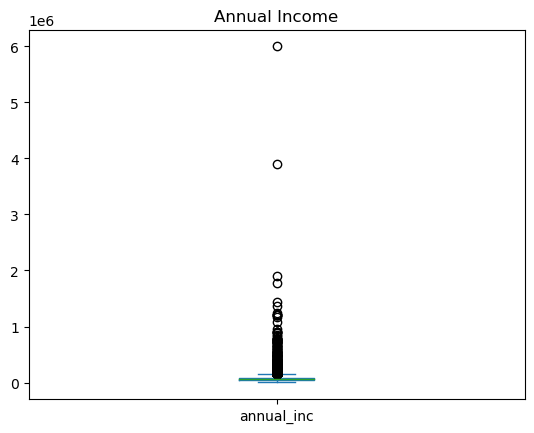

In [30]:
loan_df.annual_inc.plot.box().set(title='Annual Income')
plt.show()

In [31]:
#Checking annual income quantile
quantiles = loan_df.annual_inc.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
quantiles

0.01     14400.0
0.25     40000.0
0.50     59000.0
0.75     82000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [32]:
#Remove outliers
loan_df = loan_df[(loan_df.annual_inc > 14400) & (loan_df.annual_inc<234144)]

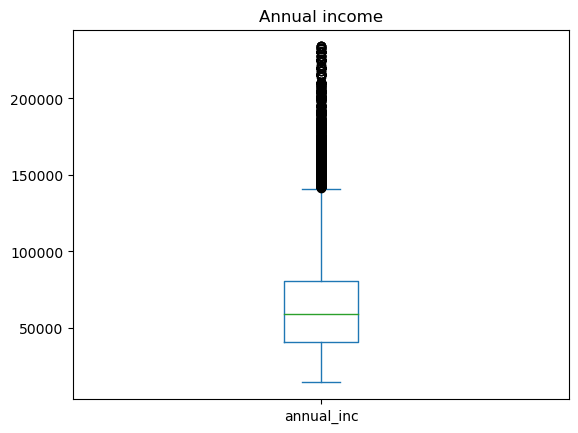

In [33]:
loan_df.annual_inc.plot.box().set(title='Annual income')
plt.show()

### Data Analysis
- Derived Metrics
- Univariate Analysis
- Segmented Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

#### Derived metrics for Month and Year from column "issue_d"

In [34]:
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975,36,10.65,162.87,B,B2,10+ years,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0
1,2500,2500,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0
3,10000,10000,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0
5,5000,5000,5000,36,7.90,156.46,A,A4,3 years,RENT,36000,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0
6,7000,7000,7000,60,15.96,170.08,C,C5,8 years,RENT,47004,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,4800,1100,36,10.28,155.52,C,C1,1 year,RENT,35000,Not Verified,2007-11-01,Fully Paid,debt_consolidation,VA,7.51,1
39573,7000,7000,1000,36,10.59,227.82,C,C2,3 years,MORTGAGE,63500,Not Verified,2007-11-01,Fully Paid,debt_consolidation,AZ,8.50,1
39623,9000,9000,700,36,12.49,301.04,D,D3,8 years,MORTGAGE,39000,Not Verified,2007-10-01,Charged Off,debt_consolidation,MD,5.08,1
39666,15450,15450,600,36,11.22,507.46,C,C4,2 years,MORTGAGE,40000,Not Verified,2007-08-01,Charged Off,debt_consolidation,VA,13.50,1


In [35]:
loan_df["issue_y"]=loan_df.issue_d.dt.year
loan_df["issue_m"]=loan_df.issue_d.dt.month
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_y,issue_m
0,5000,5000,4975,36,10.65,162.87,B,B2,10+ years,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,2011,12
1,2500,2500,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,2011,12
3,10000,10000,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,2011,12
5,5000,5000,5000,36,7.90,156.46,A,A4,3 years,RENT,36000,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2011,12
6,7000,7000,7000,60,15.96,170.08,C,C5,8 years,RENT,47004,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2011,12


In [36]:
#Calculate Loan to Amount income ratio
loan_df["loan_amt_to_income_ratio"] = loan_df.loan_amnt/loan_df.annual_inc
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_y,issue_m,loan_amt_to_income_ratio
0,5000,5000,4975,36,10.65,162.87,B,B2,10+ years,RENT,...,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,2011,12,0.208333
1,2500,2500,2500,60,15.27,59.83,C,C4,< 1 year,RENT,...,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,2011,12,0.083333
3,10000,10000,10000,36,13.49,339.31,C,C1,10+ years,RENT,...,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,2011,12,0.203252
5,5000,5000,5000,36,7.90,156.46,A,A4,3 years,RENT,...,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2011,12,0.138889
6,7000,7000,7000,60,15.96,170.08,C,C5,8 years,RENT,...,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2011,12,0.148923


In [37]:
#Create new column loan_status_code with 0 and 1 values based on loan_status column where 0="Charged Off" and 1="Fully Paid"
loan_status_map = {'Charged Off':1,'Fully Paid':0 }
loan_df["loan_status_code"] = loan_df["loan_status"].map(loan_status_map)
loan_df["loan_status_code"].value_counts()

0    31728
1     5367
Name: loan_status_code, dtype: int64

In [38]:
#Combining "Source Verified" and "Verified" into "Verified"
loan_df["verification_status"] = loan_df.verification_status.str.replace("Source Verified", "Verified")

loan_df.verification_status.value_counts()


Verified        21384
Not Verified    15711
Name: verification_status, dtype: int64

In [39]:
#Treating for int_rate
bins = [5, 9, 13, 17, 21, 25]
labels = ['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan_df['int_rate_group'] = pd.cut(loan_df['int_rate'], bins=bins,
                               labels=labels)

loan_df['int_rate_group'].value_counts()

9%-13%     13469
13%-17%    10680
5%-9%       9486
17%-21%     3134
21%-25%      326
Name: int_rate_group, dtype: int64

In [40]:
#Treating for annual_income
bins = [ 14400, 25000, 50000, 100000,150000,234000]
labels = ['14k-25k','25k-50k','50k-100k','100k-150k','150k-250k']

loan_df['annual_inc_group'] = pd.cut(loan_df['annual_inc'], bins=bins,
                               labels=labels)
loan_df['annual_inc_group'].value_counts()

50k-100k     17424
25k-50k      12599
100k-150k     3925
14k-25k       2066
150k-250k     1081
Name: annual_inc_group, dtype: int64

### Univariate Analysis

In [41]:
#define function to plot countplot for categorical variables
import seaborn as sns
def plotgraph(df, col_name):
    fig, ax = plt.subplots(figsize=(10,6)  , dpi=100)
    sns.countplot(x=col_name, data=df, order = df[col_name].value_counts().index)
    ax.set_xlabel(col_name)
    ax.set_ylabel('No of loans')
    ax.set_title('Plot of ' + col_name, weight='bold')
    plt.xticks(rotation=90)
    plt.show()

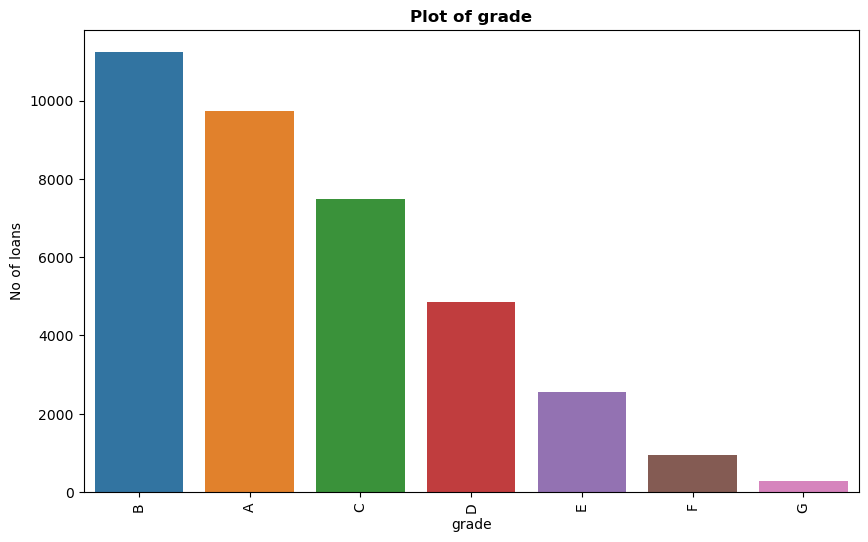

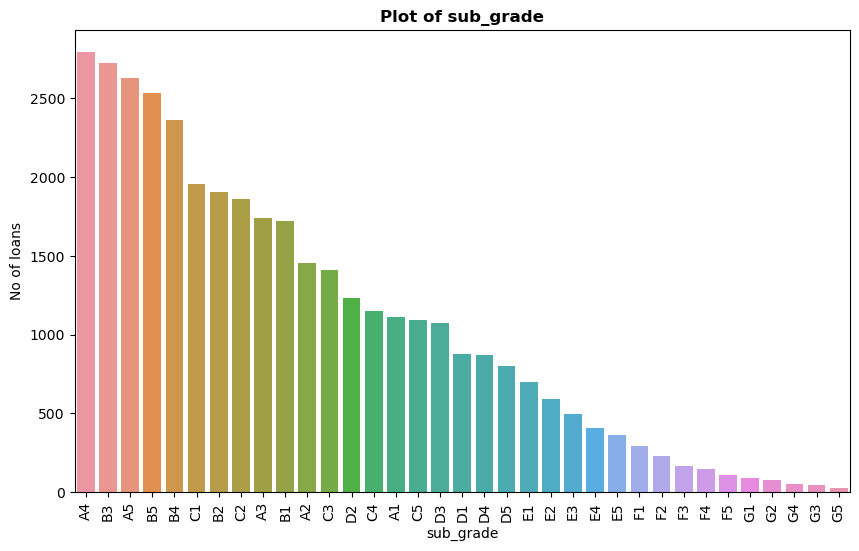

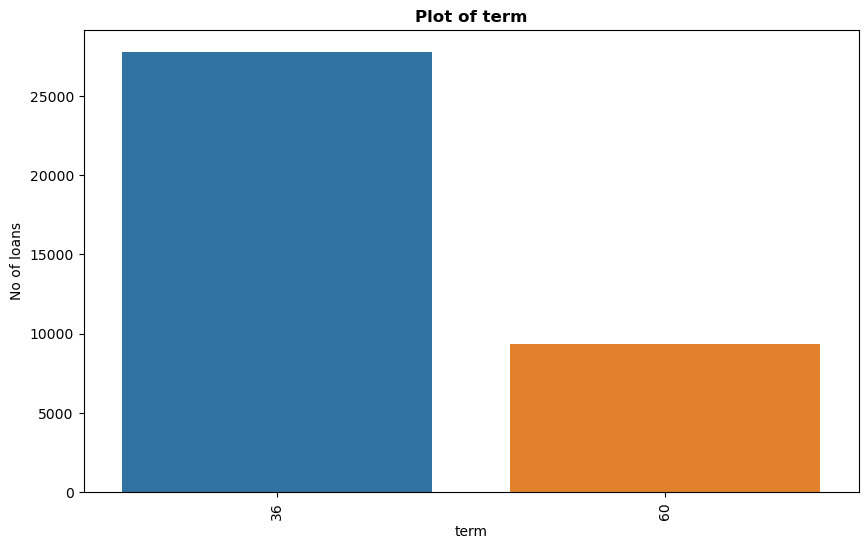

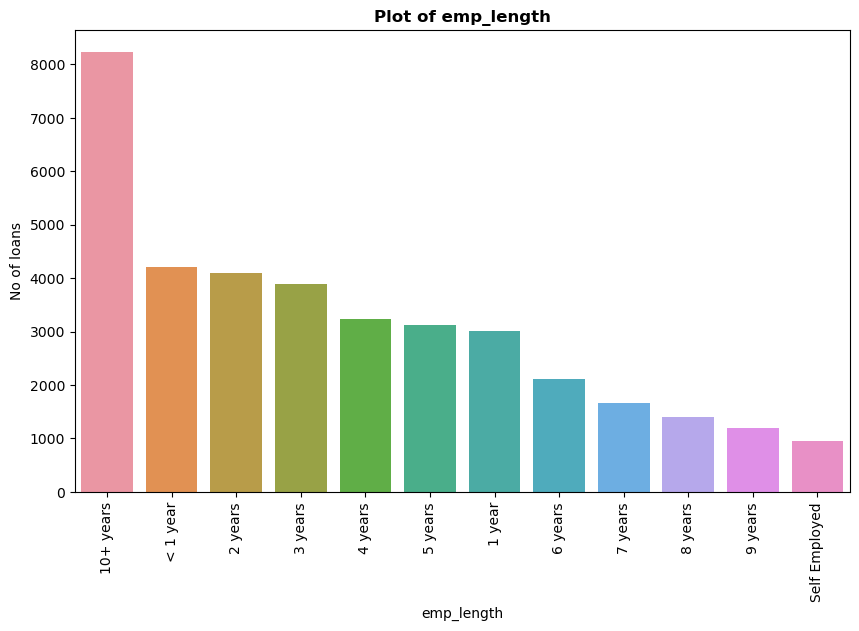

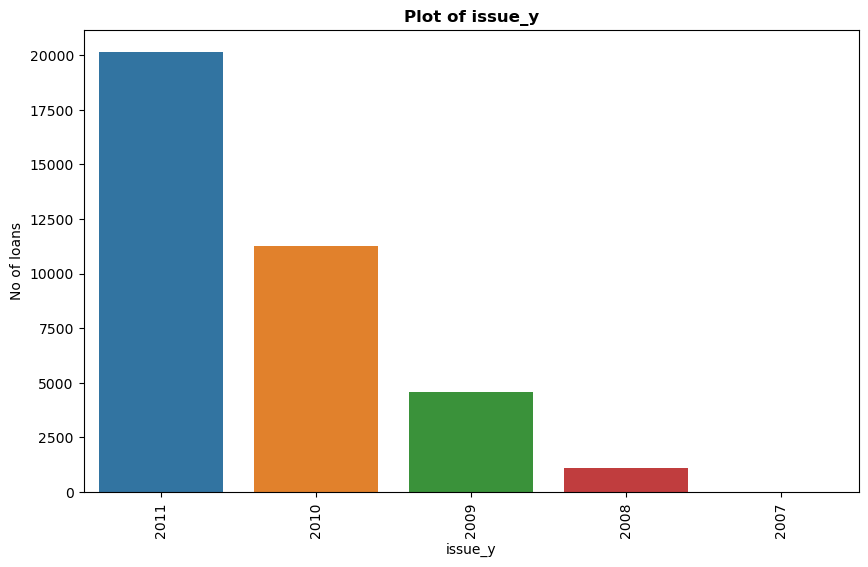

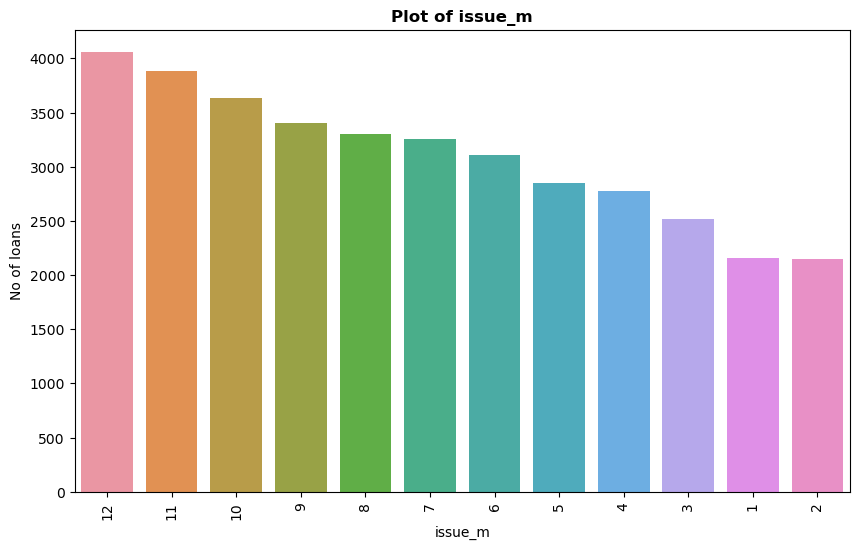

In [42]:
#countplot for "grade", "sub_grade","term","emp_length","issue_y","issue_m"
for col in ["grade", "sub_grade","term","emp_length","issue_y","issue_m"]:
    plotgraph(loan_df, col)

### Observation

- Graph of Grade represent Grade A and B are given more loans compared to other grades
- Graph of Sub Grade represent Sub Grade A4, B3, A5, B5, B4 are given more loans compared to other grades
- Graph of term represent 36 months loans are more compared to 60 months loan
- Graph of employees with 10 years and above are given loan as compared with lesser experience
- Graph of issue year shows maximum loans were given in the year 2011. Trend is increasing with the increase in the year
- Graph of issue month shows there is increasing trend in number of loans with increase in the months. More number of loans were given in Oct, Nov, Dec months.

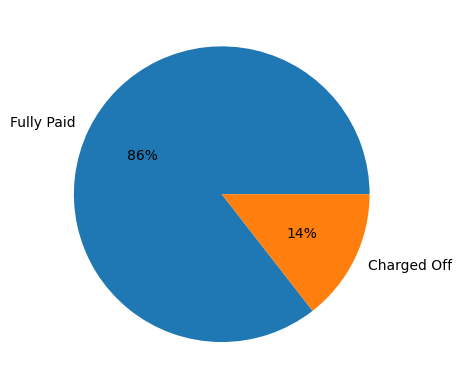

In [43]:
#Plot pie chart for loan_status
data = loan_df.loan_status.value_counts()
labels = ['Fully Paid','Charged Off']
plt.pie(data, labels=labels, autopct = '%0.0f%%')

plt.show()

### Observation
14% of the loans are defaulted and remaning are paid off

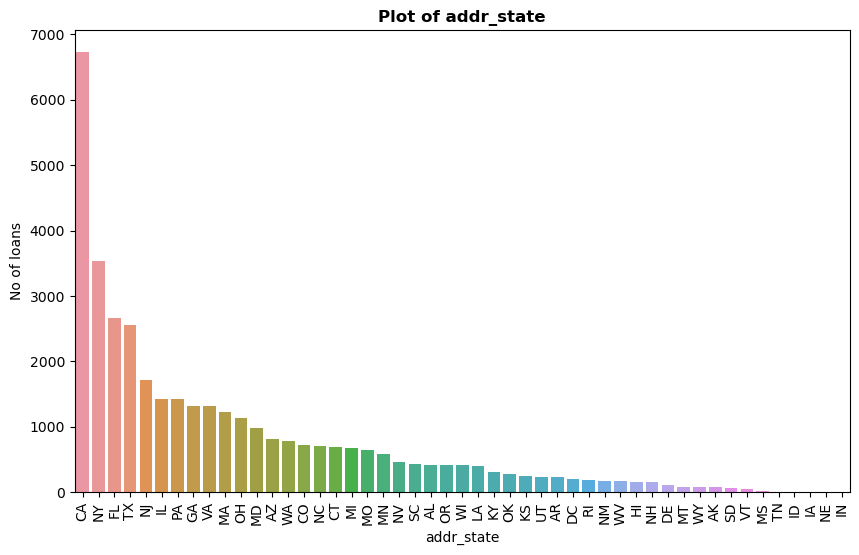

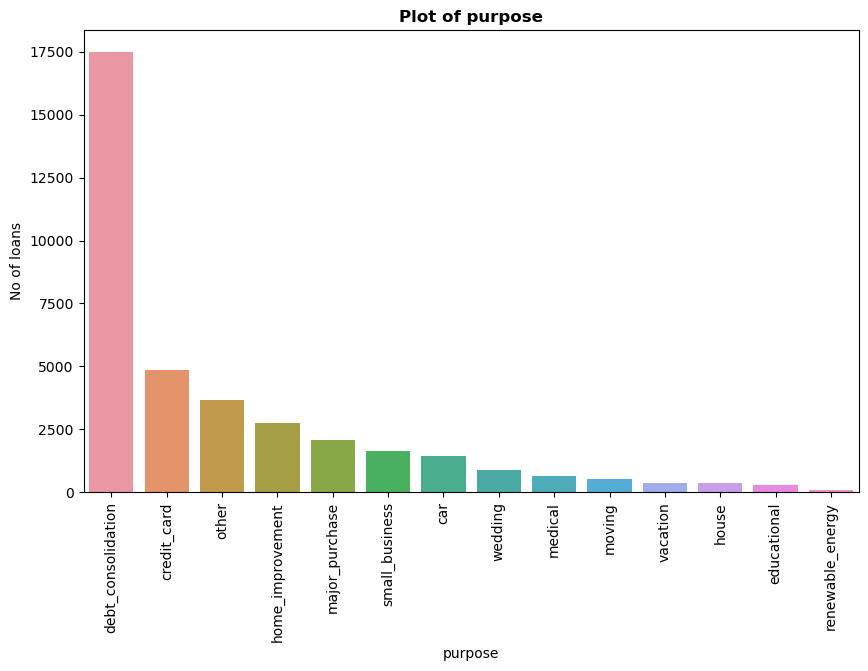

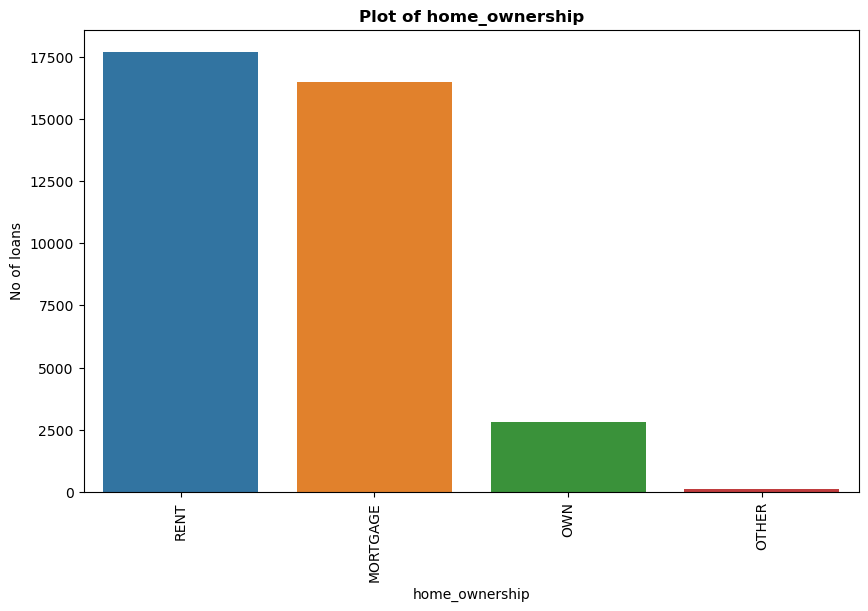

In [44]:
#Plot countplot for "addr_state", "purpose","home_ownership"
for col in ["addr_state", "purpose","home_ownership"]:
    plotgraph(loan_df, col)

### Observation

- Maximum number of loan are taken in States CA, NY, FL and TX
- Maximum number of loans are given for debt consolidation, paying off Credit card and 'other' reasons
- Minimum number of loans are taken by Education and renewable energy category
- People are taking more loan if they are in Rented house or Mortgage

In [45]:
#function defenation to plot countplot for numerical variables
def plotgraph_num(df, col_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data=df[col_name], kde=True   )
    plt.subplot(1,2,2)
    sns.boxplot(data=df[col_name])
    plt.suptitle('Distribution of '+ col_name)
    plt.show()

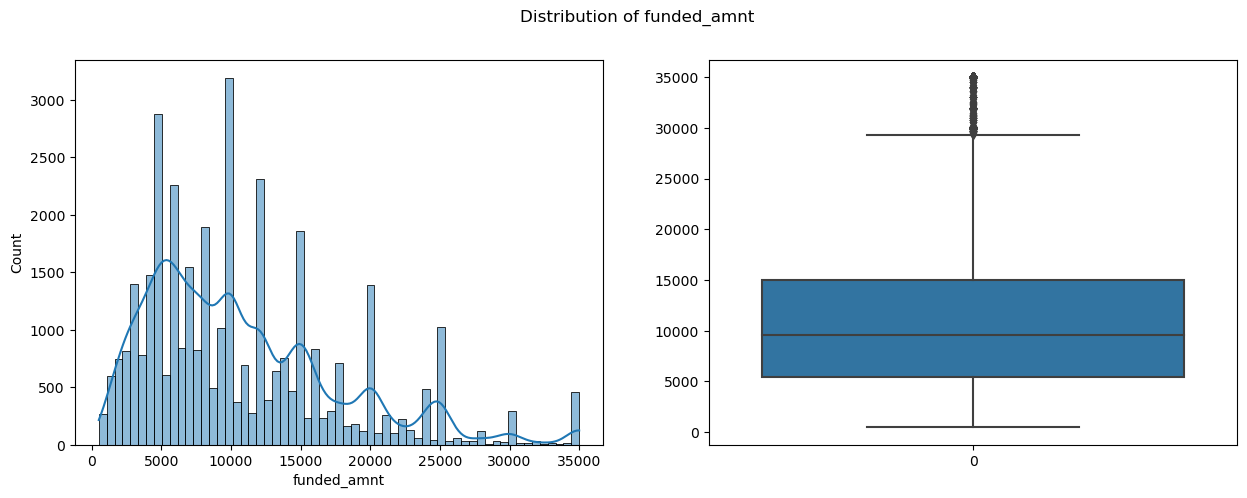

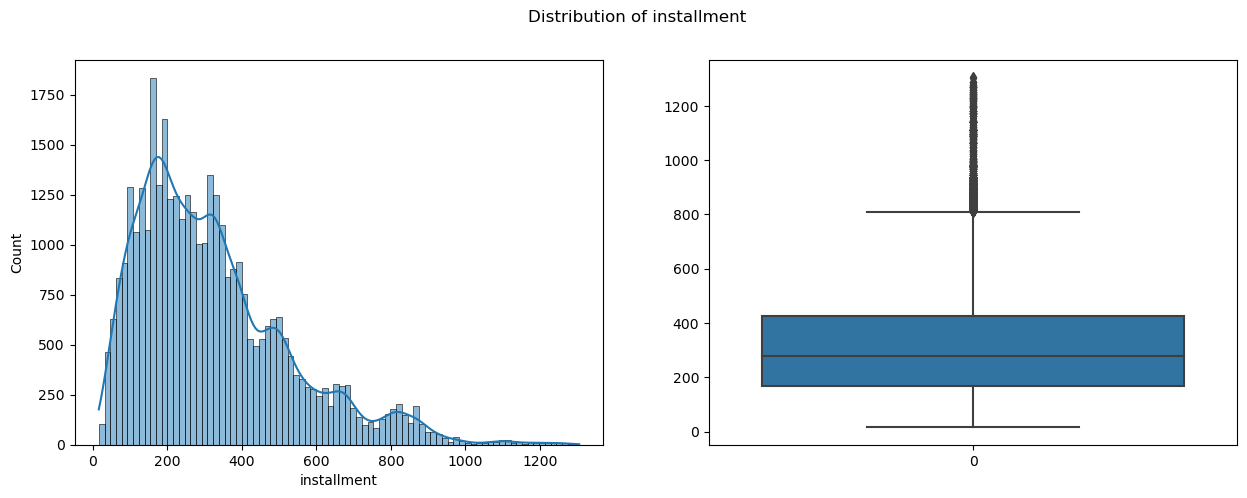

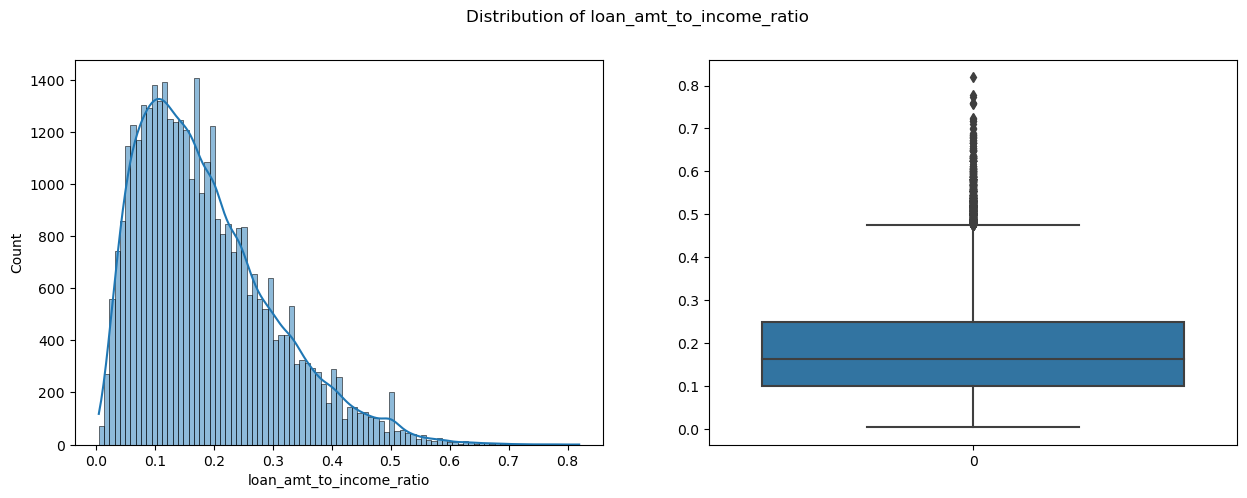

In [46]:
#Plot distplot and boxplot for "funded_amnt","installment","amnt_to_inc_ratio"
for col in ["funded_amnt","installment","loan_amt_to_income_ratio"]:
    plotgraph_num(loan_df, col)

### Observation
- Box plot shows us that the funded amount Q1-Q3 ranges from 5000 to 15000 USD
- Box plot shows us that the Installment amount Q1-Q3 ranges from 200 to 400 USD
- The amount to income ratio median is around 0.18 which is a good indicator

### Segment Univariate Analysis

In [47]:
#Creating the groups for segment analysis
bins = [5, 9, 13, 17, 21, 25]
labels = ['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']

loan_df['int_rate_group'] = pd.cut(loan_df['int_rate'], bins=bins,
                               labels=labels)

loan_df['int_rate_group'].value_counts()

9%-13%     13469
13%-17%    10680
5%-9%       9486
17%-21%     3134
21%-25%      326
Name: int_rate_group, dtype: int64

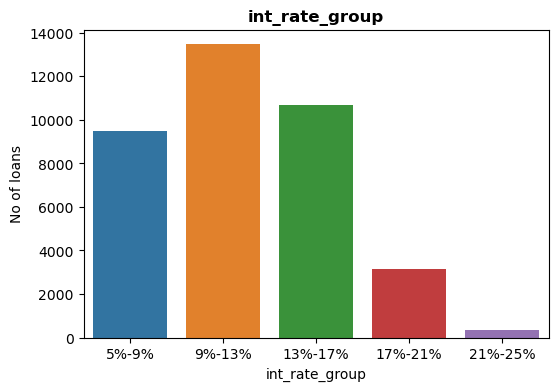

In [48]:
#Countplot of int_rate_group
fig, ax = plt.subplots(figsize=(6,4)  , dpi=100)

sns.countplot(x='int_rate_group', 
              data=loan_df)
 
ax.set_xlabel('int_rate_group')
ax.set_ylabel('No of loans')

ax.set_title('int_rate_group', weight='bold')

plt.show()

### Observation:
- Maximum loan are given in the range of 9 - 13
- Minimum loans are given in range of 21-25

### Summary of univariate analaysis

- Grades A and B receive the most loans, particularly grades A4, B3, A5, B5, and B4.
- 36-month loans are more common than 60-month loans.
- Borrowers with 10 or more years of experience are more likely to be granted loans.
- Loan numbers have steadily increased over the years, with the highest amount borrowed in 2011. 
- Loan numbers peak in October, November, and December.
- Approximately 15% of loans result in charge-offs.
- Loans are predominantly issued in the states of CA, NY, FL, and TX.
- Debt consolidation, credit card repayment, and other purposes account for the majority of loans.
- Education and renewable energy loans are infrequent.
- Individuals residing in rented or mortgaged homes receive the most loans.
- Loan amounts range from $5,000 to $15,000.
- Installment amounts typically fall between $200 and $400.
- The median amount-to-income ratio is approximately 0.18, indicating favorable loan terms.
- Loans with interest rates between 9% and 13% are the most common.
- Loans with rates between 21% and 25% are less prevalent.

## Bivariate Analysis
Following fields will be checked against loan status

### Ordered categorical data
- Grade
- Sub grade
- Term (36 / 60 months)
- Employment length
- Year
- Month
### Un-ordered categorical data
- State
- Loan purpose
- Home Ownership
- Verified status
### Quantitative
- Interest rate
- Annual income
- DTI
- Loan amount to annual income ratio


In [49]:
#Function defination which will help us plot the graph for Bivariate Analysis

def plot_ratio_graph(loan_df,x_column,y_column,hue_column,figx = 10,figy = 6):

    df = loan_df[[x_column,y_column]]

    df_pivot= df.pivot_table(index=x_column, columns=[y_column], aggfunc='size', fill_value=0).reset_index()
    
    #Sum of loans
    df_pivot['Total'] = df_pivot.sum(axis=1)
    
    #Ratio of x_column parameter passed with Charged off loan
    df_pivot['Ratio'] = (df_pivot[1] / df_pivot['Total'])*100

    # Sample data

    x = df_pivot[x_column]
    
    y2 = df_pivot['Ratio']
    
    display(df_pivot)
    # Create the first plot with the left y-axis

    fig, ax1 = plt.subplots(figsize=(figx,figy))

    sns.countplot(x=x_column, hue=hue_column,

                  data=loan_df.sort_values(x_column),

                  palette = "Set2")

    ax1.set_xlabel(x_column)

    ax1.set_ylabel('number of loans', color='b')

    ax1.tick_params('y', colors='b')
    
    # Rotating the lable of x axis by 90 Degree
    plt.xticks(rotation=90)
    
    # Create the second plot with the right y-axis
    
    ax2 = ax1.twinx()

    ax2.plot(x, y2, 'r-')

    ax2.set_ylabel('Charged Off Ratio', color='r')

    ax2.tick_params('y', colors='r')

 

    # Adding title
    plt.title(x_column +' versus charged off')

 

    # Display the plot

    plt.show()




### Ordered Categorical Data

#### Grade vs loan status

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/2901138587.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pivot['Total'] = df_pivot.sum(axis=1)


loan_status_code,grade,0,1,Total,Ratio
0,A,9159,575,9734,5.907130
1,B,9881,1362,11243,12.114204
2,C,6201,1280,7481,17.110012
3,D,3801,1057,4858,21.757925
4,E,1868,688,2556,26.917058
5,F,630,306,936,32.692308
6,G,188,99,287,34.494774


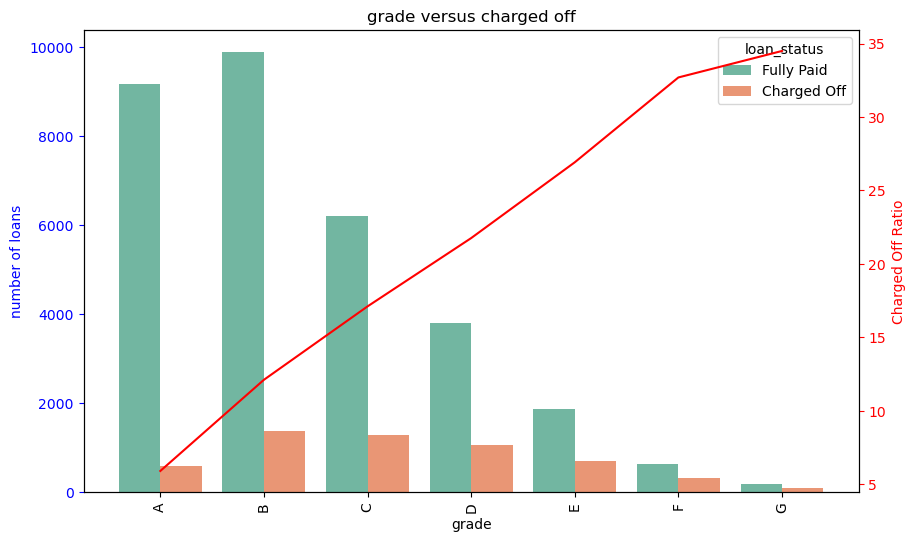

In [50]:
# Plotting graph using the above defined function
# Grade VS loan status
plot_ratio_graph(loan_df,"grade","loan_status_code","loan_status")

### Observation

Based on the ratio of charged off Vs total loan number when compared with grades
- Grade A loan are less likely to be charged off
- Grade G loan are more likely to be charged off
- As the Grade increases from A to G, the charged off ratios also increases, with A having the lowest charged off rate

#### Sub Grade vs Loan Staus

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/2901138587.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pivot['Total'] = df_pivot.sum(axis=1)


loan_status_code,sub_grade,0,1,Total,Ratio
0,A1,1084,28,1112,2.517986
1,A2,1386,71,1457,4.873027
2,A3,1643,97,1740,5.574713
3,A4,2622,173,2795,6.189624
4,A5,2424,206,2630,7.832700
5,B1,1557,162,1719,9.424084
6,B2,1695,209,1904,10.976891
7,B3,2397,327,2724,12.004405
8,B4,2044,317,2361,13.426514
9,B5,2188,347,2535,13.688363


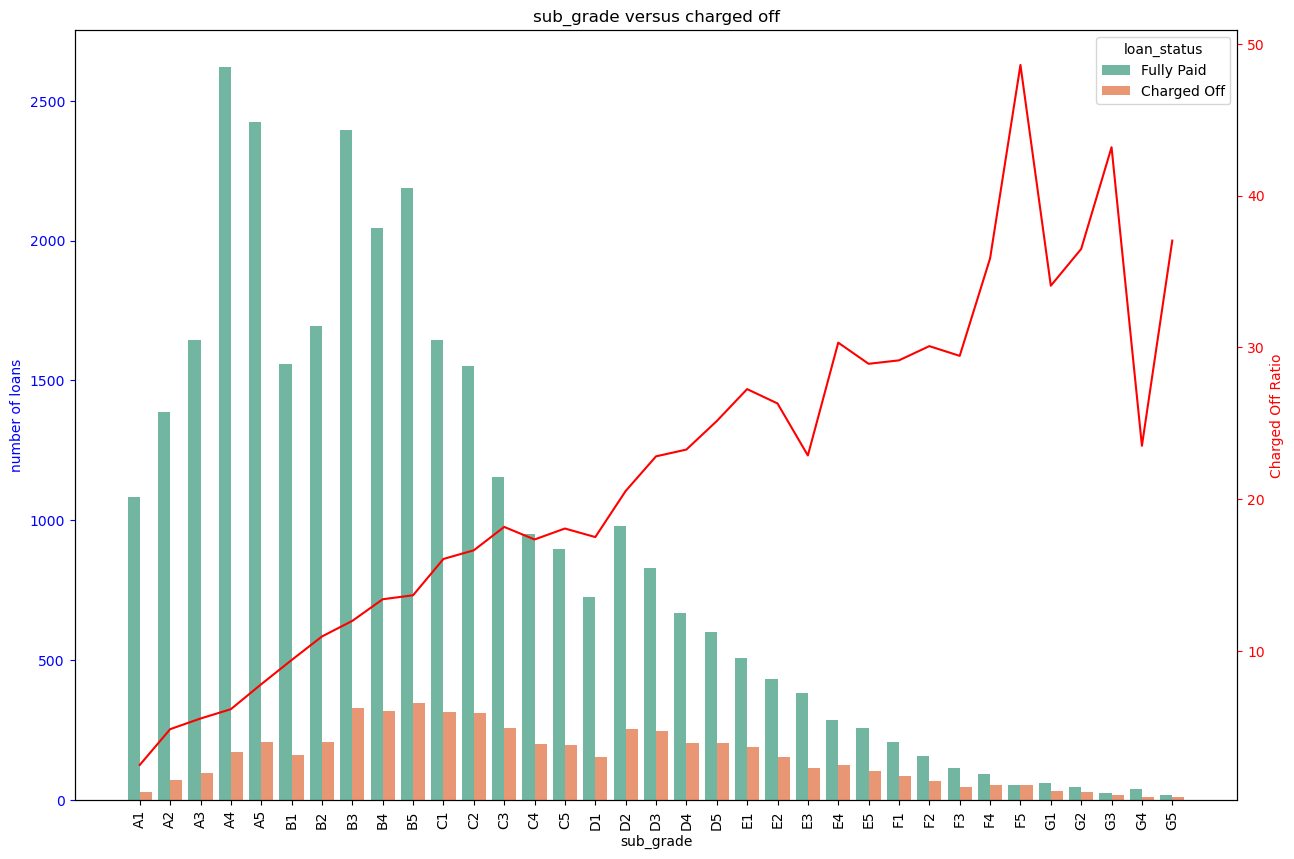

In [51]:
# Plotting graph using the above function
# sub grade VS loan status
plot_ratio_graph(loan_df,"sub_grade","loan_status_code","loan_status",15,10)


### Observation

Based on the ratio of charged off Vs total loan number when compared with sub grades
- Sub Grade A1 has the lowest ratio of charged off
- sub Grade F5 has the highest ratio of charged off
- As the Grade increases from A1 to G5, the charged off ratios also increases, but there are some subgrade which does not follow the trend
- The plot of Grade and Sub grade has the Similarities in the chraged off ratio

#### Term vs Loan Staus

loan_status_code,term,0,1,Total,Ratio
0,36,24769,3002,27807,10.795843
1,60,6959,2365,9384,25.202472


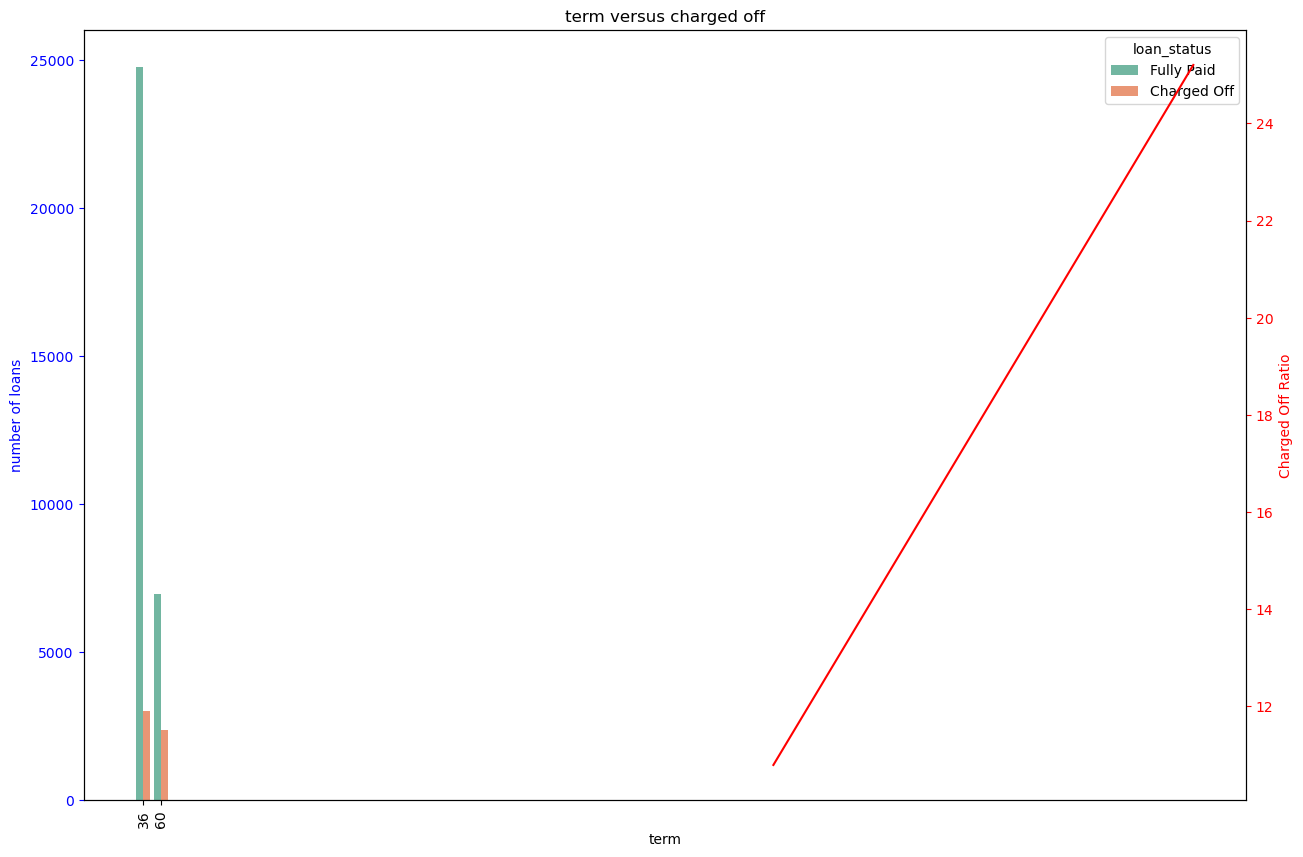

In [52]:
# Term VS loan status
plot_ratio_graph(loan_df,"term","loan_status_code","loan_status",15,10)

### Observation

Based on the ratio of charged off Vs total loan number when compared with term of the loan
- Higher the term higher chance of charged off


#### Employment Length vs Loan Staus

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/2901138587.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pivot['Total'] = df_pivot.sum(axis=1)


loan_status_code,emp_length,0,1,Total,Ratio
0,1 year,2578,432,3010,14.352159
1,10+ years,6941,1287,8228,15.641711
2,2 years,3567,531,4098,12.957540
3,3 years,3348,537,3885,13.822394
4,4 years,2798,440,3238,13.588635
5,5 years,2674,447,3121,14.322333
6,6 years,1812,299,2111,14.163903
7,7 years,1410,256,1666,15.366146
8,8 years,1193,200,1393,14.357502
9,9 years,1043,155,1198,12.938230


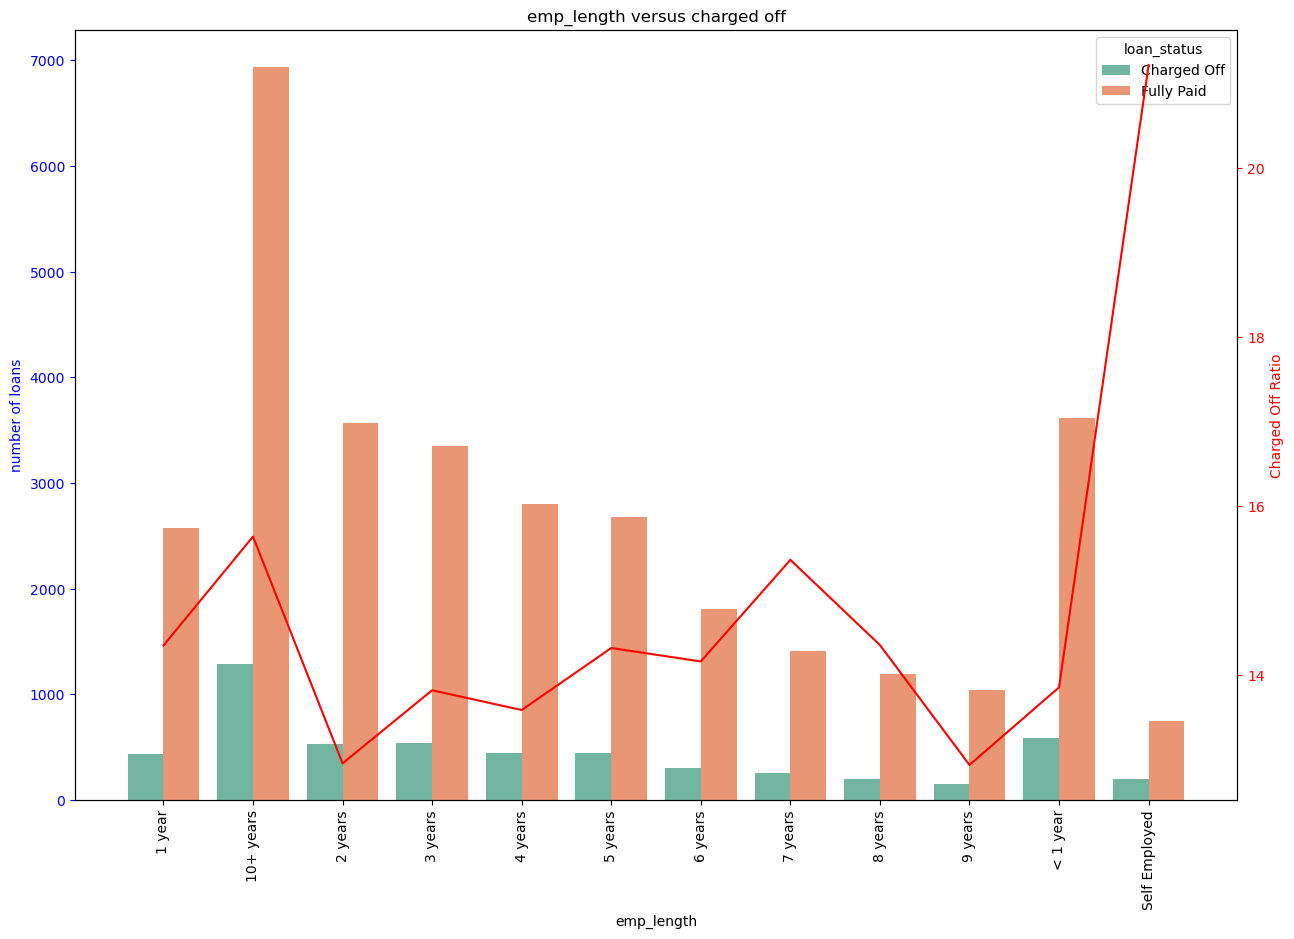

In [53]:
# Employment Length VS loan status
plot_ratio_graph(loan_df,"emp_length","loan_status_code","loan_status",15,10)

### Observation

Based on the ratio of charged off Vs total loan number when compared with employee length
- Self Employed are more like to charged off the loan as compared to the people in Job


#### Loan Issue Year vs Loan Status

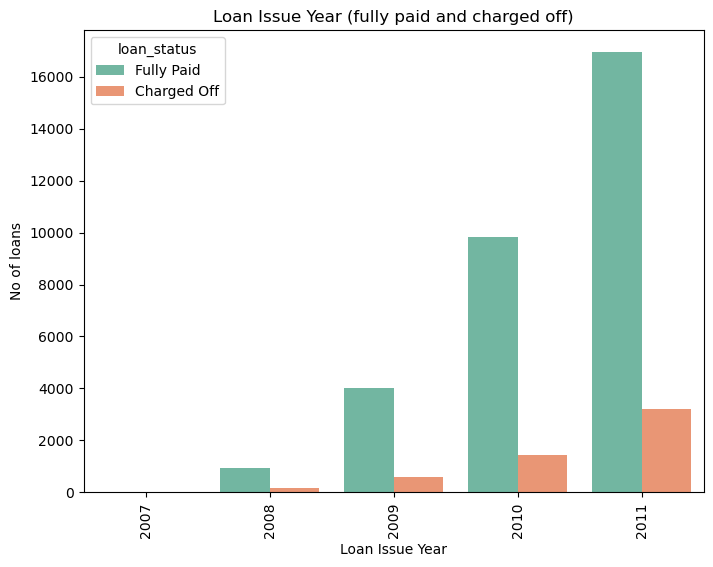

In [54]:
#Loan Issue Year vs Loan Status
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='issue_y',
              data=loan_df, hue="loan_status",
              palette = "Set2")
              

ax.set_xlabel('Loan Issue Year')
ax.set_ylabel('No of loans')

ax.set_title('Loan Issue Year (fully paid and charged off)')

plt.show()

### Observation

- Maximum number of loan are charged off in 2011
- As the year increase the loan charged off also increase

#### Loan Issue Month vs Loan Status

loan_status_code,issue_m,0,1,Total,Ratio
0,1,1876,281,2158,13.021316
1,2,1890,255,2147,11.877038
2,3,2199,316,2518,12.549643
3,4,2414,360,2778,12.958963
4,5,2400,452,2857,15.820791
5,6,2642,468,3116,15.019255
6,7,2788,468,3263,14.342629
7,8,2850,449,3307,13.577260
8,9,2873,534,3416,15.632319
9,10,3077,554,3641,15.215600


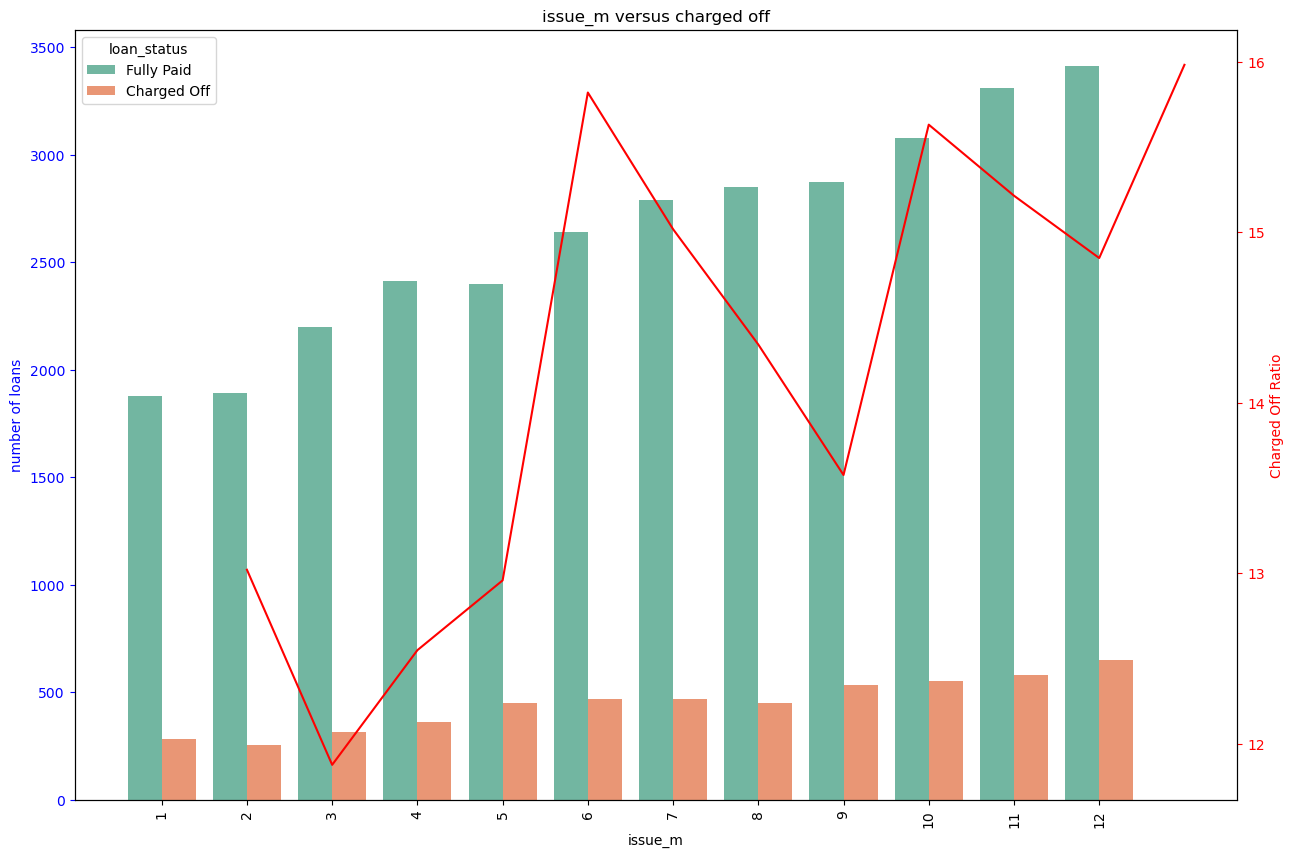

In [55]:
# Issue Month VS loan status
plot_ratio_graph(loan_df,"issue_m","loan_status_code","loan_status",15,10)

### Observation

- Maximum number of loan are charged off in last month of the year i.e sep, oct, dec
- Plot shows maximum loans were given in the month of Oct, Nov, Dec.

### Bivariate Analysis - Unordered categorial data

#### Purpose vs Loan Staus

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/2901138587.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pivot['Total'] = df_pivot.sum(axis=1)


loan_status_code,purpose,0,1,Total,Ratio
0,car,1290,151,1441,10.478834
1,credit_card,4333,524,4857,10.788553
2,debt_consolidation,14816,2666,17482,15.249971
3,educational,233,44,277,15.884477
4,home_improvement,2412,328,2740,11.970803
5,house,295,57,352,16.193182
6,major_purchase,1872,211,2083,10.129621
7,medical,556,100,656,15.243902
8,moving,456,85,541,15.711645
9,other,3063,591,3654,16.174056


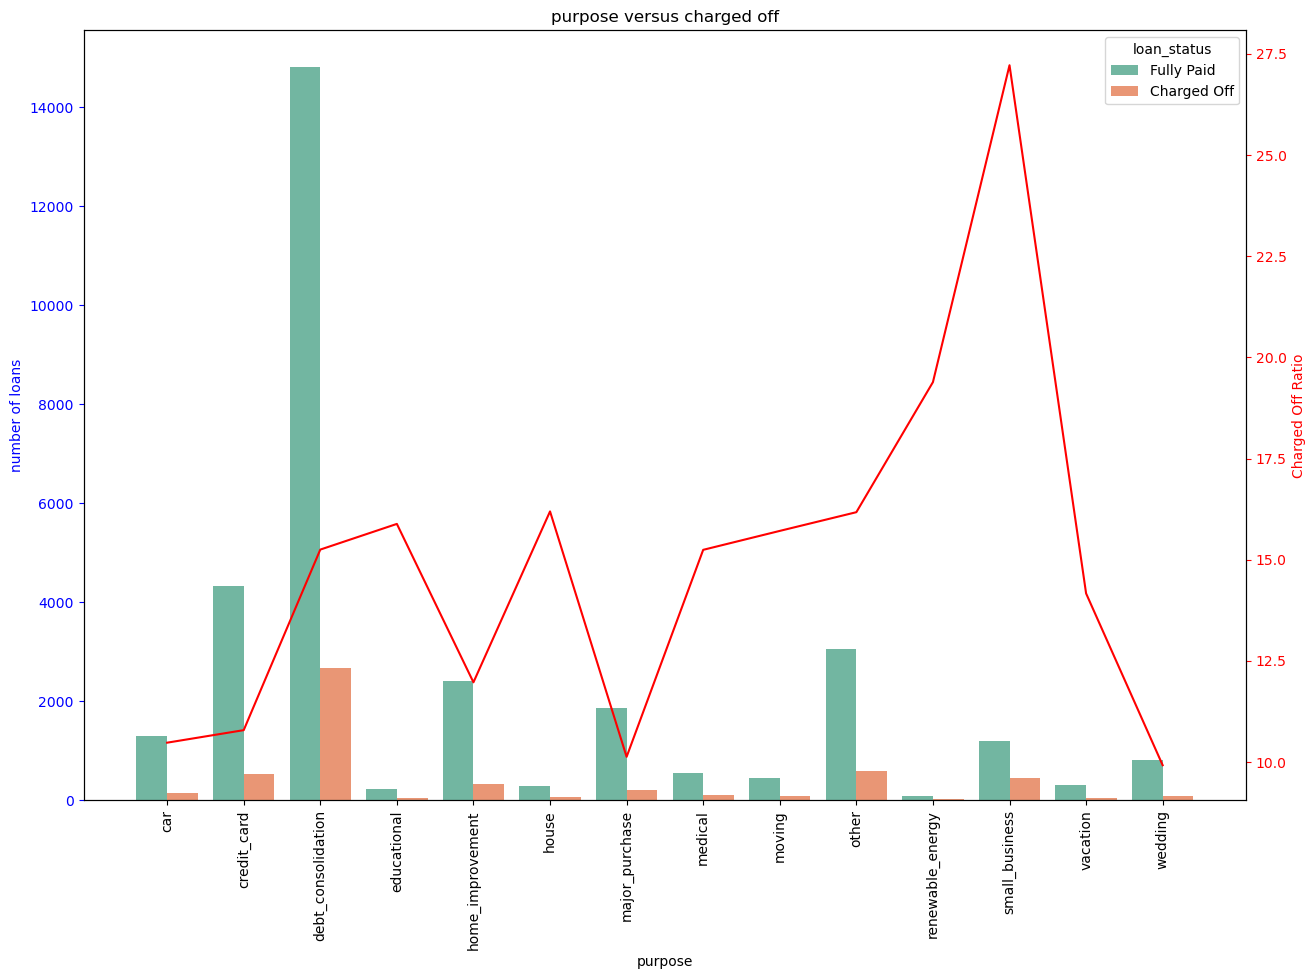

In [56]:
# purpose VS loan status
plot_ratio_graph(loan_df,"purpose","loan_status_code","loan_status",15,10)

### Observation

Based on the ratio of charged off Vs total loan number when compared with Purpose
- Small Business loan are more likely to be charged off
- Wedding loan are very less likely to be charged off
- As per the ratio car, credit car, major purchase are less likely to charged off

#### Home Ownership vs Loan Staus

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/2901138587.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pivot['Total'] = df_pivot.sum(axis=1)


loan_status_code,home_ownership,0,1,Total,Ratio
0,MORTGAGE,14233,2254,16487,13.671377
1,OTHER,77,18,95,18.947368
2,OWN,2393,413,2806,14.718460
3,RENT,15025,2682,17707,15.146552


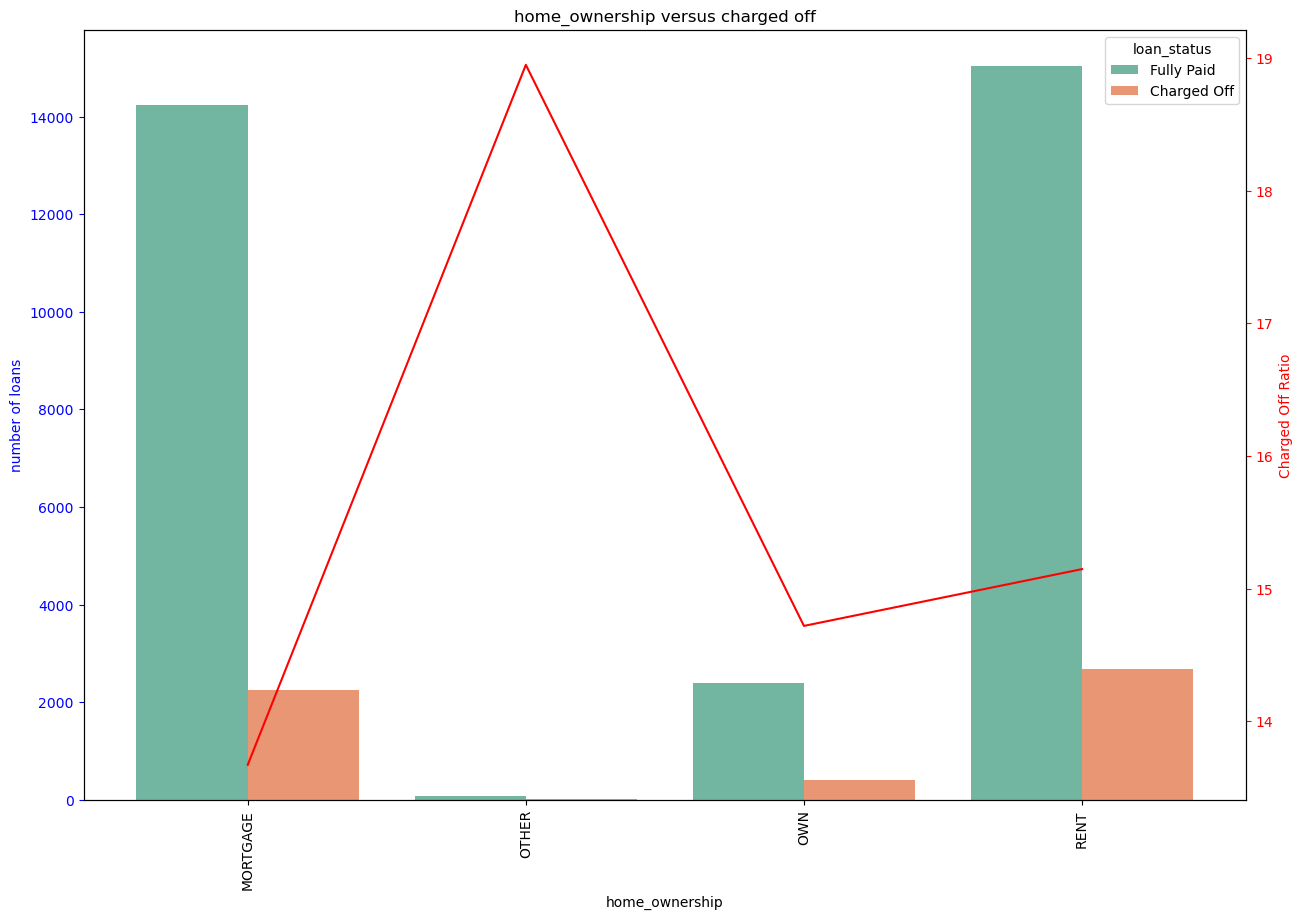

In [57]:
# home_ownership VS loan status
plot_ratio_graph(loan_df,"home_ownership","loan_status_code","loan_status",15,10)

### Observation

Based on the ratio of charged off Vs total loan number when compared with Home Ownership
- Other loan are more likely to be charged off
- Mortgage loan are less likely to be charged off

#### Verification vs Loan Staus

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/2901138587.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pivot['Total'] = df_pivot.sum(axis=1)


loan_status_code,verification_status,0,1,Total,Ratio
0,Not Verified,13751,1960,15711,12.475336
1,Verified,17977,3407,21384,15.932473


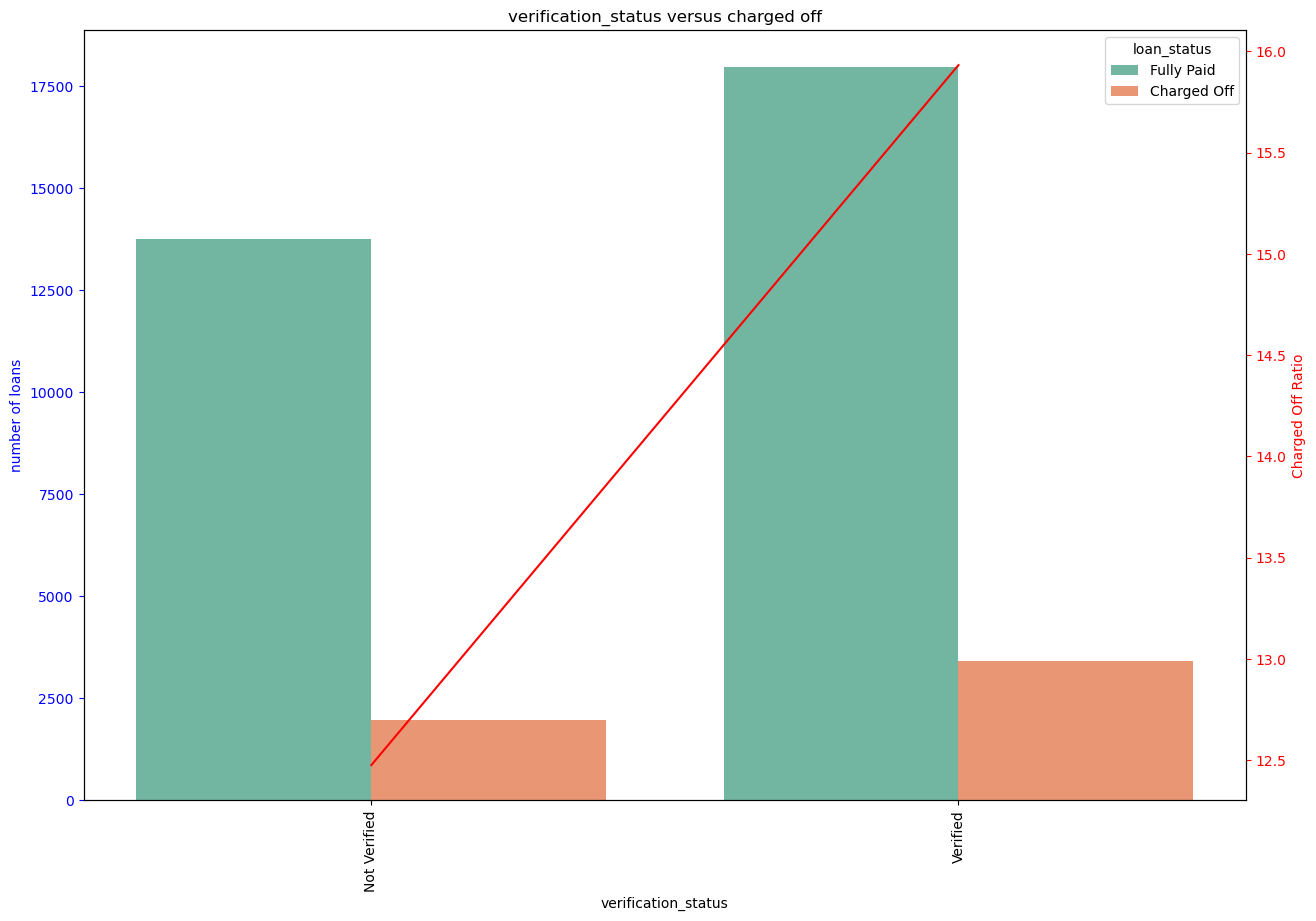

In [58]:
# verification_status VS loan status
plot_ratio_graph(loan_df,"verification_status","loan_status_code","loan_status",15,10)

### Observation

Based on the ratio of charged off Vs total loan number when compared with Verification status
- Verified are more likely to be charged off
- Not Verified are less likely to be charged off

#### State vs Loan Staus

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/2901138587.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pivot['Total'] = df_pivot.sum(axis=1)


loan_status_code,addr_state,0,1,Total,Ratio
0,AK,62,14,76,18.421053
1,AL,371,54,425,12.705882
2,AR,204,25,229,10.917031
3,AZ,699,119,818,14.547677
4,CA,5652,1073,6725,15.955390
5,CO,634,92,726,12.672176
6,CT,606,91,697,13.055954
7,DC,193,14,207,6.763285
8,DE,99,12,111,10.810811
9,FL,2189,471,2660,17.706767


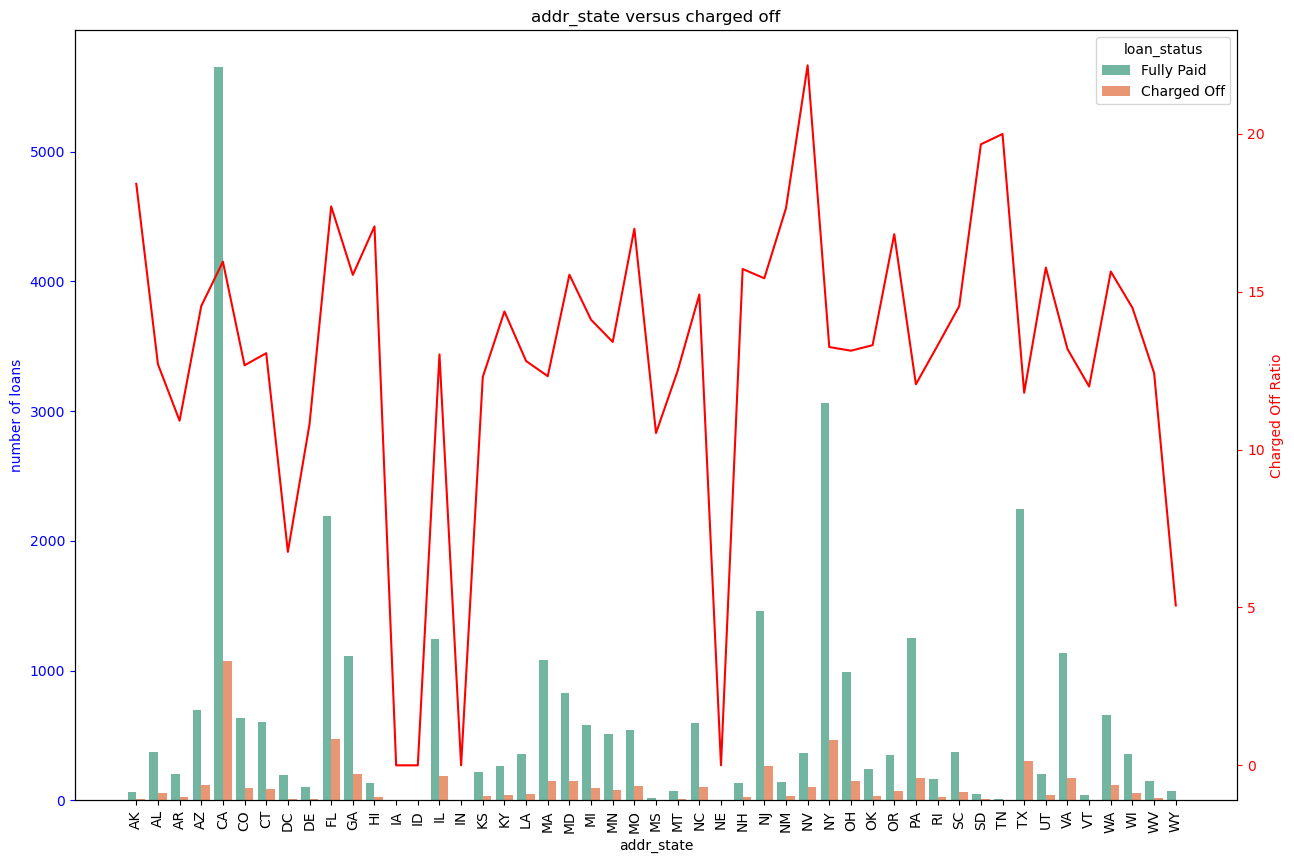

In [59]:
# addr_state VS loan status
plot_ratio_graph(loan_df,"addr_state","loan_status_code","loan_status",15,10)

### Observation

Based on the ratio of charged off Vs total loan number when compared with State
- States AK,FL,HI,NM,NV,SD,TN are more likely to be charged off
- States DC,IA,ID,IN,NE,WY are less likely to be charged off

## Quantitative 

#### DTI vs loan status

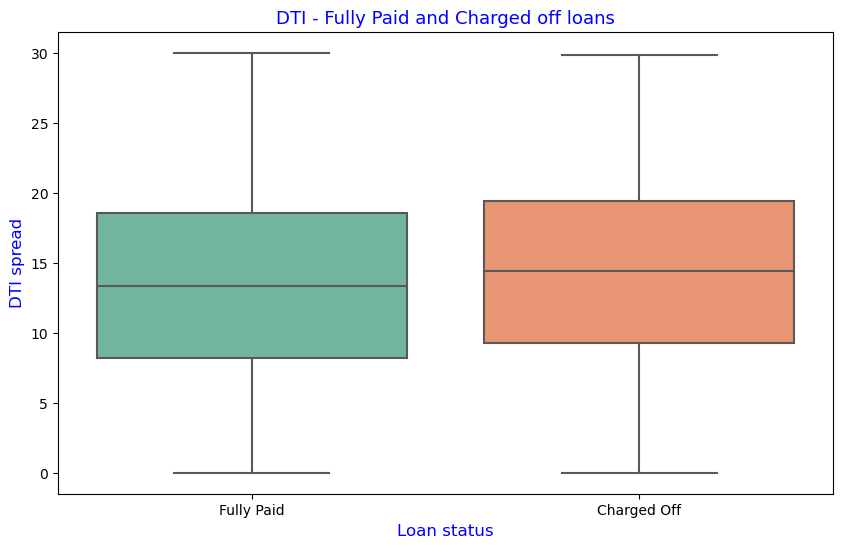

In [60]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='dti', x='loan_status', data =loan_df,palette='Set2')
ax.set_title('DTI - Fully Paid and Charged off loans',fontsize=13,color='b')
ax.set_ylabel('DTI spread',fontsize=12,color = 'b')
ax.set_xlabel('Loan status',fontsize=12,color = 'b')
plt.show()

### Observation

- Mean for Fully Paid and charged off are very close to each other. so we can ignore the DTI varaible in analysis

#### amnt_to_inc_ratio vs Loan status

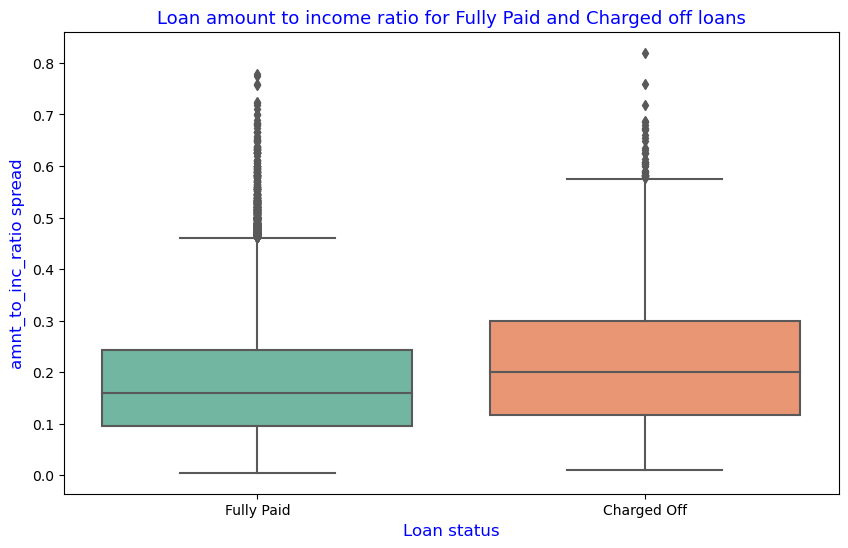

In [61]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='loan_amt_to_income_ratio', x='loan_status', data =loan_df,palette='Set2')
ax.set_title('Loan amount to income ratio for Fully Paid and Charged off loans',fontsize=13,color='b')
ax.set_ylabel('amnt_to_inc_ratio spread',fontsize=12,color = 'b')
ax.set_xlabel('Loan status',fontsize=12,color = 'b')
plt.show()

### Observation

- If the loan amount is high with respect to income then the changes of Default is high

#### Annual income vs loan_status and percentage of Charged Off

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/2901138587.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pivot['Total'] = df_pivot.sum(axis=1)


loan_status_code,annual_inc_group,0,1,Total,Ratio
0,14k-25k,1688,378,2066,18.296225
1,25k-50k,10511,2088,12599,16.572744
2,50k-100k,15056,2368,17424,13.590450
3,100k-150k,3511,414,3925,10.547771
4,150k-250k,962,119,1081,11.008326


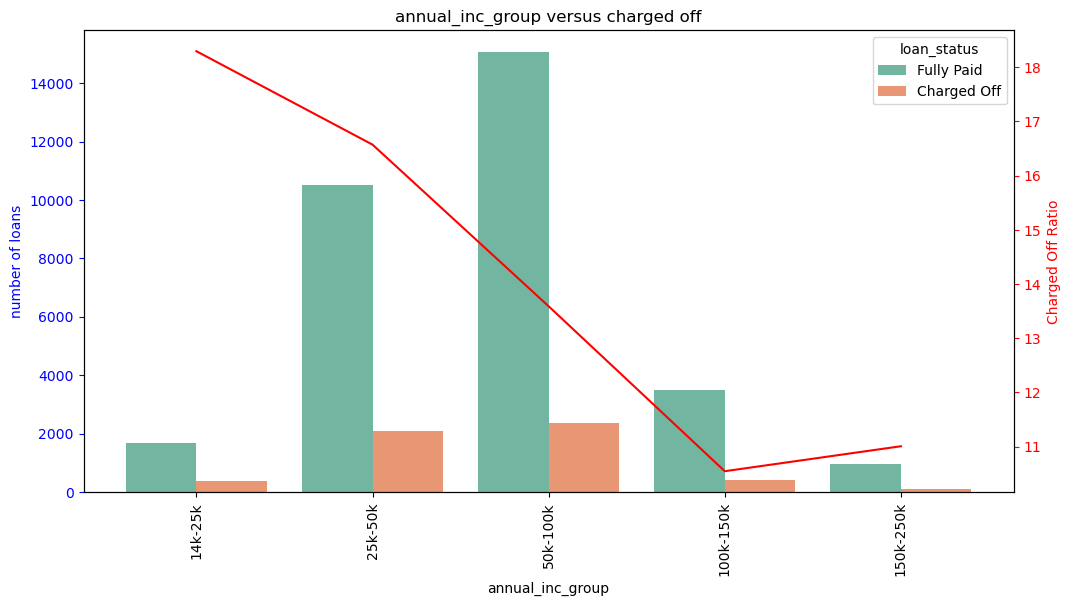

In [62]:
# Annual income group VS loan status
plot_ratio_graph(loan_df,"annual_inc_group","loan_status_code","loan_status",12,6)

### Observation

- Low income group are more likely to default the loan

#### Interest rate vs loan_status and percentage of Charged Off

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/2901138587.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pivot['Total'] = df_pivot.sum(axis=1)


loan_status_code,int_rate_group,0,1,Total,Ratio
0,5%-9%,8928,558,9486,5.882353
1,9%-13%,11767,1702,13469,12.636424
2,13%-17%,8652,2028,10680,18.988764
3,17%-21%,2199,935,3134,29.834078
4,21%-25%,182,144,326,44.171779


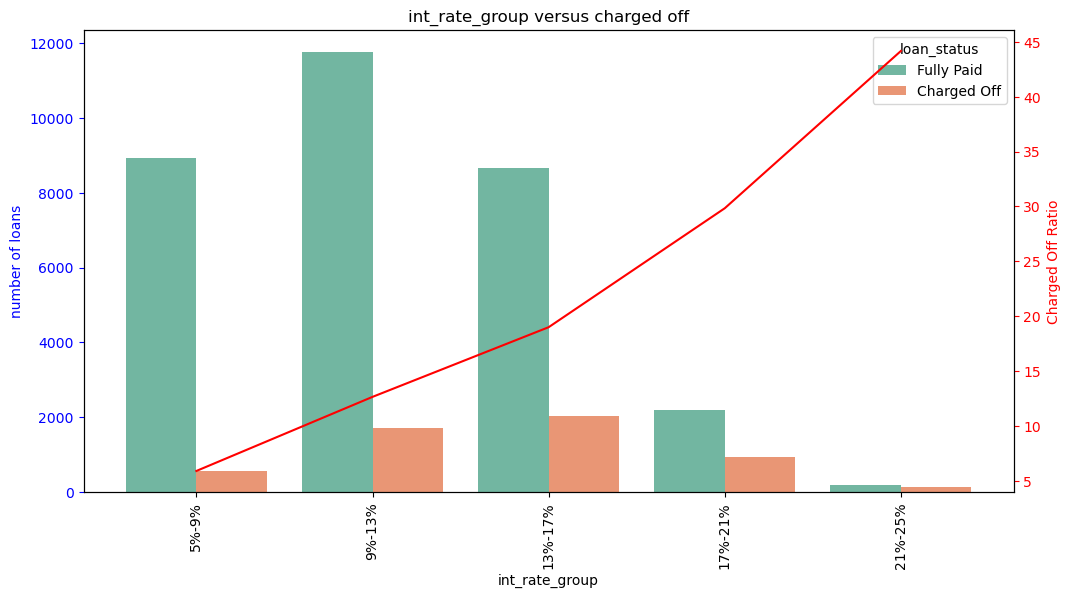

In [63]:
# Interest rate group VS loan status
plot_ratio_graph(loan_df,"int_rate_group","loan_status_code","loan_status",12,6)

### Observation

- Higher the Interest rate higher is the chance to default the loan

### Multivariate Analysis

/var/folders/hb/scxx_rkd7zvbjl9g9x0ktwmc0000gp/T/ipykernel_56156/3376059270.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan_df.corr()


<Axes: >

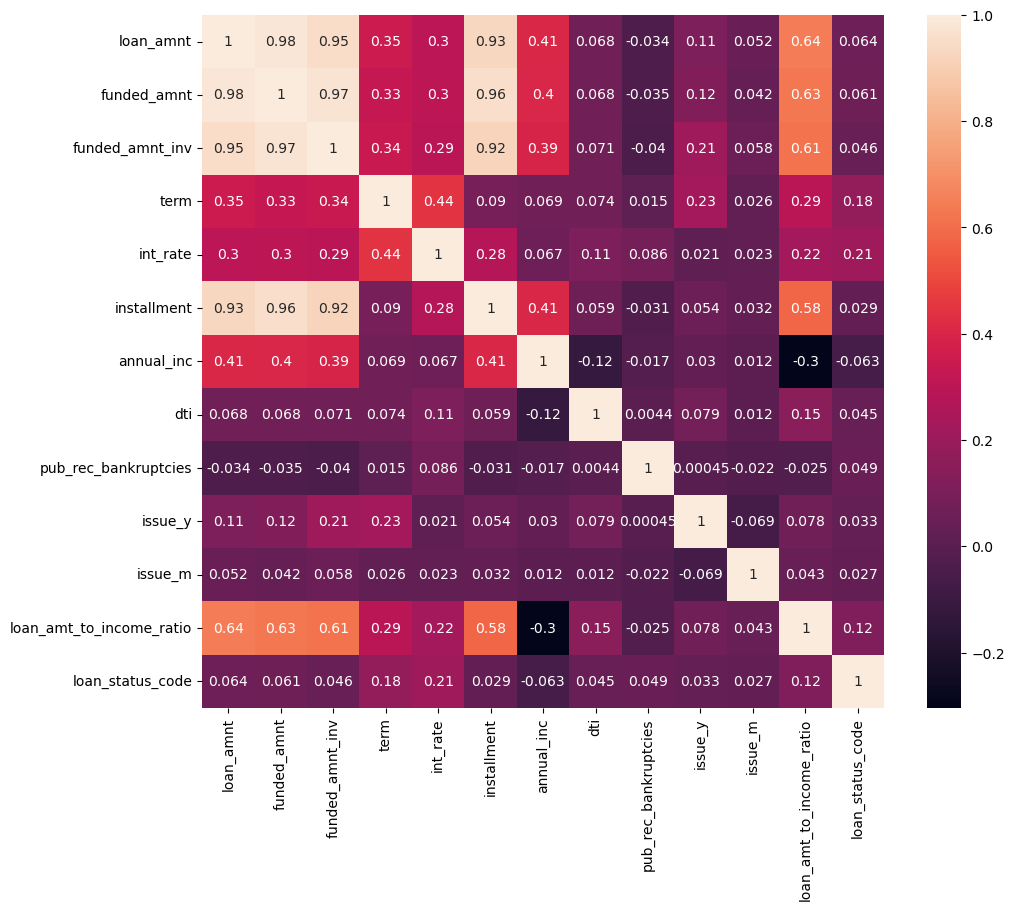

In [64]:
#To analyze the correlation between variables and identify which variables have a negative impact on loan_status 
fig, ax = plt.subplots(figsize=(11, 9))
corr = loan_df.corr()
sns.heatmap(corr, annot=True)

### Observation

- The annaul_inc, installment, issue_m, amnt_to_inc_ratio, loan_amt, funded_amt, issue_y have negative impact on the loan_status from the above correlation heatmap

## Summary of Bivariate and Multivariate Analysis

- Loan default tendency increases as the grade of the loan goes from A to G.
- Borrowers in subgrades F5, G3, and G5 exhibit the highest likelihood of loan default.
- Self-employed borrowers, as well as those with 10 and 7 years of employment, have a higher tendency to default on loans.
- Borrowers from the states NV, TN, SD, AK, FL, and HI demonstrate the highest tendency to default on loans.
- Small business category borrowers have the highest chances of loan default.
- Borrowers classified as "Other" have the highest tendency to default on loans.
- Loan default tendency is higher among borrowers in lower income groups, decreasing as annual income increases.
- There is a positive correlation between the interest rate and loan default tendency.
- The correlation graph indicates that variables such as annual income, installment, issue month, loan amount-to-income ratio, loan amount, funded amount, and issue year have a negative impact on the loan status variable.